<a href="https://colab.research.google.com/github/angelzhangg/SLP-Student-Stress-Levels/blob/main/slp_pre_survey.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Loading Packages**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats

In [ ]:
## Loading Dataset
df = pd.read_csv("../content/SLP Be Well Pre-Survey.csv")

# **Dataset Processing & Cleaning**

## **1. Removing Columns/Rows**

In [ ]:
# Removing the first row 'Import Id'
df.drop(df.index[1], inplace=True)

# Droping unnessary columns  to simplify dataset
df = df.drop(['StartDate','EndDate','Status','IPAddress','Duration (in seconds)','RecordedDate',
              'RecipientFirstName', 'RecipientLastName', 'RecipientEmail', 'ExternalReference' , 'LocationLatitude', 'LocationLongitude', 'DistributionChannel','UserLanguage'], axis=1)

# resetting the Index
df.reset_index(drop=True, inplace=True)
df


,Progress,Finished,ResponseId,Q1,Q31,Q6,Q7,Q8,Q4_1,Q4_2,...,Q23,Q24,Q25,Q26,Q27,Q28,Q29,Q30,Q31.1,Q32
0,Progress,Finished,Response ID,RESEARCH CONSENT FORM\n\nTitle: Impact of Holi...,Please create a Unique ID code using First- a ...,Are you participating in the speech-language p...,What year of graduate study are you currently in?,What is your current employment status?,Perceived Stress Scale - 10 items (PSS-10)©\n\...,Perceived Stress Scale - 10 items (PSS-10)©\n\...,...,I feel that I have a reliable support system,I feel a sense of belonging within my social a...,I feel comfortable seeking help when I am feel...,How effectively do you feel you communicate wi...,I feel that I have the ability to express my f...,How confident are you in your ability to adjus...,How do you typically cope with stress?,Do you think your coping mechanisms are effect...,What does “good mental well-being” look like t...,What are some goals related to improving your ...
1,100,True,R_3r6wsT9PTAEOMVa,No,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100,True,R_6qfEzbTIXtM87RI,Yes,03ve28,Yes,2nd year,Part-time,Fairly Often,Sometimes,...,Neutral,Neutral,Neutral,Very effective,Neutral,Very confident,NaN,NaN,NaN,NaN
3,100,True,R_7dtru7svucL7fwZ,Yes,30MS11,Yes,1st year,Student only,Sometimes,Fairly Often,...,Neutral,Neutral,Neutral,Moderately effective,Neutral,Moderately confident,breathing or taking a step back,they are… typically because when I breathe or ...,someone who has control over their stress,to complete all academic work
4,3,False,R_6JRTNDoK5Jvc2vq,Yes,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,3,False,R_5eh4w9c9xbFfrjo,Yes,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57,3,False,R_3vk1d0lnwZXpJ89,Yes,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58,16,False,R_1pppRxI6AxcevIZ,Yes,0821,Yes,1st year,Full-time,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59,16,False,R_7geaIKcMXGpHD7S,Yes,0611AR0611,Yes,1st year,Full-time,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Filter rows where 'Finished' surveys is 'True'
finished_surveys = df[df['Finished'] == 'True']

# Get the number of rows in the filtered DataFrame
finished_surveys.shape

(34, 46)

## 2. **Removing Null Values**

In [ ]:
# Step 1: Filter rows where Q4_1 to Q4_10 have responses (non-null values)
# Q4 = Percieved Stress Scale
df = df[df[['Q4_1', 'Q4_2', 'Q4_3', 'Q4_4', 'Q4_5', 'Q4_6', 'Q4_7', 'Q4_8', 'Q4_9', 'Q4_10']].notna().all(axis=1)]


# Reset index (optional)
df.reset_index(drop=True, inplace=True)
df

,Progress,Finished,ResponseId,Q1,Q31,Q6,Q7,Q8,Q4_1,Q4_2,...,Q23,Q24,Q25,Q26,Q27,Q28,Q29,Q30,Q31.1,Q32
0,Progress,Finished,Response ID,RESEARCH CONSENT FORM\n\nTitle: Impact of Holi...,Please create a Unique ID code using First- a ...,Are you participating in the speech-language p...,What year of graduate study are you currently in?,What is your current employment status?,Perceived Stress Scale - 10 items (PSS-10)©\n\...,Perceived Stress Scale - 10 items (PSS-10)©\n\...,...,I feel that I have a reliable support system,I feel a sense of belonging within my social a...,I feel comfortable seeking help when I am feel...,How effectively do you feel you communicate wi...,I feel that I have the ability to express my f...,How confident are you in your ability to adjus...,How do you typically cope with stress?,Do you think your coping mechanisms are effect...,What does “good mental well-being” look like t...,What are some goals related to improving your ...
1,100,True,R_6qfEzbTIXtM87RI,Yes,03ve28,Yes,2nd year,Part-time,Fairly Often,Sometimes,...,Neutral,Neutral,Neutral,Very effective,Neutral,Very confident,NaN,NaN,NaN,NaN
2,100,True,R_7dtru7svucL7fwZ,Yes,30MS11,Yes,1st year,Student only,Sometimes,Fairly Often,...,Neutral,Neutral,Neutral,Moderately effective,Neutral,Moderately confident,breathing or taking a step back,they are… typically because when I breathe or ...,someone who has control over their stress,to complete all academic work
3,19,False,R_5QXL47NL5q5VhBv,Yes,0813,Yes,1st year,Student only,Sometimes,Almost Never,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100,True,R_1zc08oEc4YQadiD,Yes,12ol10,Yes,1st year,Part-time,Fairly Often,Fairly Often,...,Agree,Agree,Neutral,Moderately effective,Neutral,Slightly confident,try to talk to a loved one and workout,sometimes,not stressed and anxious constantly. being abl...,be less stressed and anxious with school and o...
5,100,True,R_1OTHEpcRu4Dy3gO,Yes,01EM18,Yes,1st year,Part-time,Sometimes,Never,...,Strongly Agree,Strongly Agree,Strongly Agree,Extremely effective,Strongly Agree,Very confident,"Crying, doing a workout, calling my mom or boy...",Yes,"Going to my favorite workout classes, talking ...",Just staying on top of due dates and being awa...
6,100,True,R_7r25BLvCWw5At37,Yes,12ju12,Yes,1st year,Part-time,Fairly Often,Fairly Often,...,Agree,Agree,Disagree,Moderately effective,Neutral,Moderately confident,"Working out, not sleeping, playing instruments",Yes the positive ones,Understanding my stressors and taking action. ...,Better sleep
7,100,True,R_3QSZcYZS4wfxCZr,Yes,08AN17,Yes,2nd year,Part-time,Sometimes,Fairly Often,...,Agree,Neutral,Agree,Moderately effective,Agree,Moderately confident,"To cope with stress, I typically talk about it...",Yes. I think they are because it helps me proc...,Good mental well-being is not being overwhelme...,To learn other effective coping strategies in ...
8,100,True,R_5lyOMJIXxZT9NZE,Yes,11-GD-21,Yes,1st year,Part-time,Sometimes,Sometimes,...,Agree,Agree,Neutral,Moderately effective,Agree,Moderately confident,Exercise,Yes,"Peace, calm, happiness","exercise, walks, meditation"
9,100,True,R_5O7jhjqWFCUwqct,Yes,01Ju03,Yes,2nd year,Student only,Fairly Often,Sometimes,...,Strongly Agree,Strongly Agree,Agree,Very effective,Strongly Agree,Very confident,"i either play a mindless game on my phone, go ...",yes,being able to manage your stress in a way that...,less irritability


## **3. Renaming/Selecting Specific Columns**

In [ ]:
# Renaming columns
df.rename(columns={'Q7': 'study_year',
                   'Q8': 'employment_status',
                   'Q9': 'coping_mechanisms',
                   'Q10': 'stress_level',
                   'Q18': 'hrs_of_social_media',
                   'Q19': 'heath_issues'}, inplace=True)

# Specific columns for ANOVA and T-test
subset_df = df[['ResponseId', 'study_year', 'employment_status', 'hrs_of_social_media', 'coping_mechanisms', 'heath_issues', 'Q4_1', 'Q4_2', 'Q4_3', 'Q4_4', 'Q4_5', 'Q4_6', 'Q4_7', 'Q4_8', 'Q4_9', 'Q4_10']]

subset_df.drop(df.index[0], inplace=True)
subset_df


<ipython-input-28-09352fe22959>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Q7': 'study_year',
<ipython-input-28-09352fe22959>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df.drop(df.index[0], inplace=True)


,ResponseId,study_year,employment_status,hrs_of_social_media,coping_mechanisms,heath_issues,Q4_1,Q4_2,Q4_3,Q4_4,Q4_5,Q4_6,Q4_7,Q4_8,Q4_9,Q4_10
1,R_6qfEzbTIXtM87RI,2nd year,Part-time,3-4 hours,Agree,"Lack of exercise,Other (please specify)",Fairly Often,Sometimes,Fairly Often,Sometimes,Sometimes,Fairly Often,Fairly Often,Sometimes,Sometimes,Sometimes
2,R_7dtru7svucL7fwZ,1st year,Student only,3-4 hours,Neutral,"Lack of sleep,Poor diet,Lack of exercise",Sometimes,Fairly Often,Very Often,Fairly Often,Sometimes,Sometimes,Sometimes,Sometimes,Very Often,Fairly Often
3,R_5QXL47NL5q5VhBv,1st year,Student only,NaN,NaN,NaN,Sometimes,Almost Never,Almost Never,Fairly Often,Fairly Often,Almost Never,Fairly Often,Sometimes,Almost Never,Almost Never
4,R_1zc08oEc4YQadiD,1st year,Part-time,1-2 hours,Neutral,"Lack of sleep,Poor diet,Lack of exercise",Fairly Often,Fairly Often,Very Often,Sometimes,Almost Never,Very Often,Almost Never,Sometimes,Fairly Often,Fairly Often
5,R_1OTHEpcRu4Dy3gO,1st year,Part-time,1-2 hours,Agree,NaN,Sometimes,Never,Sometimes,Very Often,Fairly Often,Never,Very Often,Fairly Often,Almost Never,Never
6,R_7r25BLvCWw5At37,1st year,Part-time,1-2 hours,Strongly Agree,Lack of sleep,Fairly Often,Fairly Often,Fairly Often,Sometimes,Sometimes,Very Often,Very Often,Never,Sometimes,Very Often
7,R_3QSZcYZS4wfxCZr,2nd year,Part-time,1-2 hours,Agree,"Poor diet,Lack of exercise",Sometimes,Fairly Often,Sometimes,Fairly Often,Sometimes,Almost Never,Sometimes,Sometimes,Fairly Often,Almost Never
8,R_5lyOMJIXxZT9NZE,1st year,Part-time,3-4 hours,Neutral,"Lack of sleep,Lack of exercise",Sometimes,Sometimes,Sometimes,Sometimes,Sometimes,Fairly Often,Almost Never,Fairly Often,Sometimes,Sometimes
9,R_5O7jhjqWFCUwqct,2nd year,Student only,5-6 hours,Agree,Lack of sleep,Fairly Often,Sometimes,Fairly Often,Fairly Often,Fairly Often,Sometimes,Almost Never,Sometimes,Fairly Often,Sometimes
10,R_6QnFcmw4gSMNa21,2nd year,Part-time,3-4 hours,Disagree,"Lack of sleep,Poor diet,Lack of exercise",Sometimes,Sometimes,Fairly Often,Sometimes,Sometimes,Sometimes,Sometimes,Fairly Often,Sometimes,Almost Never


## **Plots and Grapahs**

In [ ]:
# Count unique values for each independent variable
print(subset_df['employment_status'].value_counts())
print(subset_df['study_year'].value_counts())
print(subset_df['hrs_of_social_media'].value_counts())
print(subset_df['coping_mechanisms'].value_counts())


employment_status
Part-time       19
Student only    12
Full-time        3
Name: count, dtype: int64
study_year
1st year    25
2nd year     9
Name: count, dtype: int64
hrs_of_social_media
1-2 hours           14
3-4 hours           13
5-6 hours            2
Less than 1 hour     1
Name: count, dtype: int64
coping_mechanisms
Agree             11
Neutral           11
Strongly Agree     4
Disagree           3
Name: count, dtype: int64


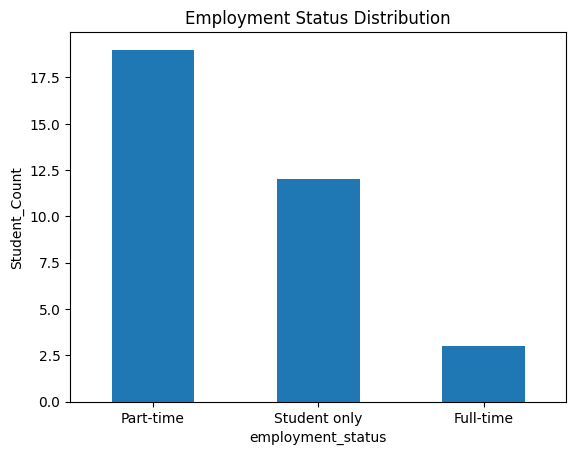

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

# Display the counts
employment_status_counts = subset_df['employment_status'].value_counts()
employment_status_counts

# Create the vertical bar plot
ax = employment_status_counts.plot.bar(rot=0, title='Employment Status Distribution')

# Set the label for the y-axis
ax.set_ylabel('Student_Count')

# Display the plot
plt.show()

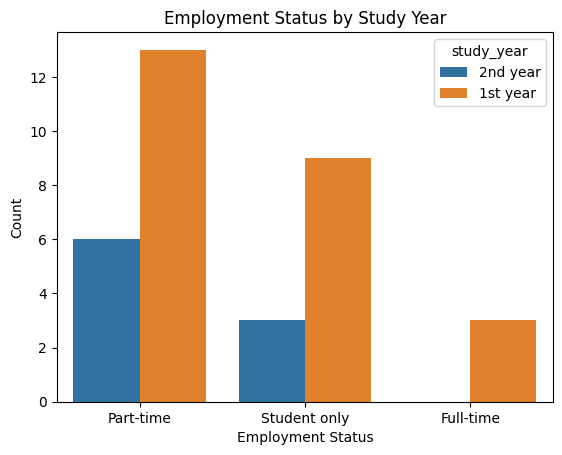

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.countplot(x='employment_status', hue='study_year', data=subset_df)
plt.title('Employment Status by Study Year')
plt.xlabel('Employment Status')
_ = plt.ylabel('Count')


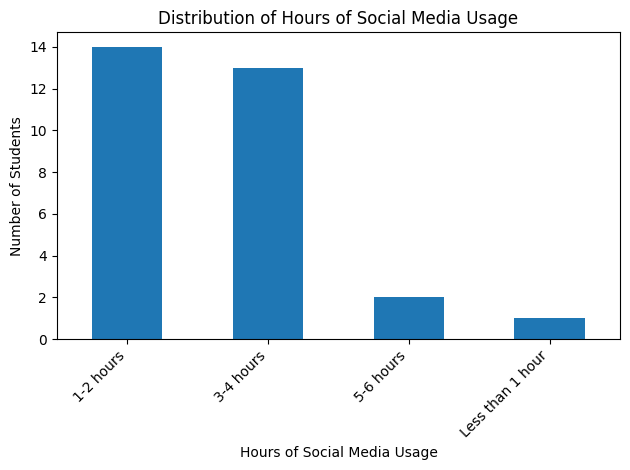

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

# Create a bar plot of social media usage
subset_df['hrs_of_social_media'].value_counts().plot(kind='bar')
plt.xlabel('Hours of Social Media Usage')  # Label for the x-axis
plt.ylabel('Number of Students')  # Label for the y-axis
plt.title('Distribution of Hours of Social Media Usage')
plt.xticks(rotation=45, ha='right')  # Rotate labels 45 degrees and align them to the right
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()


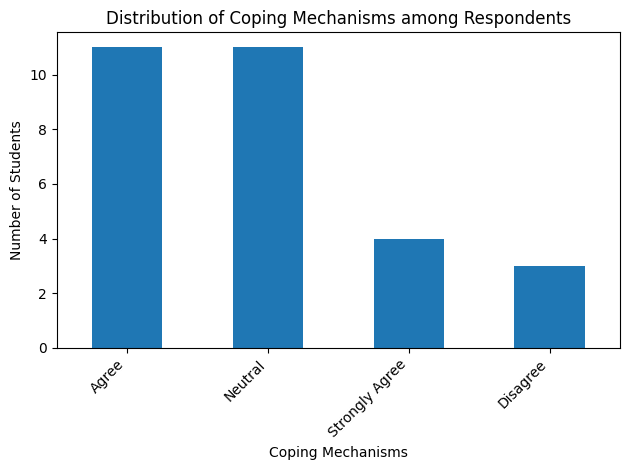

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

# Create a bar plot of coping mechanisms
subset_df['coping_mechanisms'].value_counts().plot(kind='bar')
plt.xlabel('Coping Mechanisms')  # Label for the x-axis
plt.ylabel('Number of Students')  # Label for the y-axis
plt.title('Distribution of Coping Mechanisms among Respondents')
plt.xticks(rotation=45, ha='right')  # Rotate labels 45 degrees and align them to the right
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()



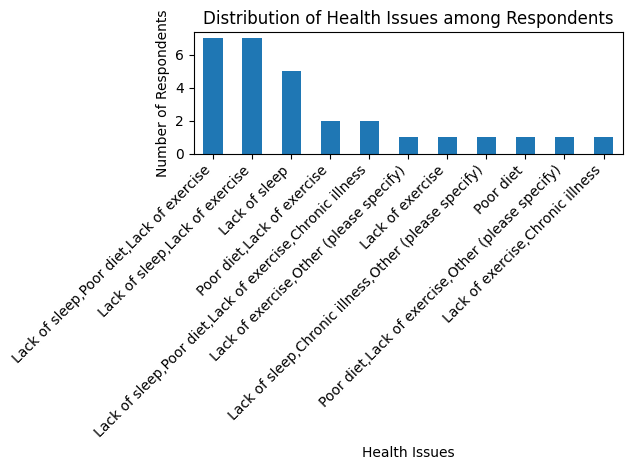

In [ ]:
import matplotlib.pyplot as plt

# Create a bar plot of health issues
subset_df['heath_issues'].value_counts().plot(kind='bar')
plt.xlabel('Health Issues')
plt.ylabel('Number of Respondents')
plt.title('Distribution of Health Issues among Respondents')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

# **Stress Score**

In [ ]:
recode_cat_num = {
    'Never': 0,
    'Almost Never': 1,
    'Sometimes': 2,
    'Fairly Often': 3,
    'Very Often': 4
}

recode_columns = ['Q4_1', 'Q4_2', 'Q4_3', 'Q4_4', 'Q4_5', 'Q4_6', 'Q4_7', 'Q4_8', 'Q4_9', 'Q4_10']

# Recode the categorical responses to numerical values
subset_df[recode_columns] = subset_df[recode_columns].replace(recode_cat_num)

# create new stress column , stress_score where 'Q4_1', 'Q4_2', 'Q4_3', 'Q4_4', 'Q4_5', 'Q4_6', 'Q4_7', 'Q4_8', 'Q4_9', 'Q4_10'
subset_df['pss_stress_score'] = subset_df[['Q4_1', 'Q4_2', 'Q4_3', 'Q4_4', 'Q4_5', 'Q4_6', 'Q4_7', 'Q4_8', 'Q4_9', 'Q4_10']].sum(axis=1)
subset_df['pss_stress_score'].describe()

<ipython-input-35-13565c335f36>:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  subset_df[recode_columns] = subset_df[recode_columns].replace(recode_cat_num)
<ipython-input-35-13565c335f36>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df[recode_columns] = subset_df[recode_columns].replace(recode_cat_num)
<ipython-input-35-13565c335f36>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

,pss_stress_score
count,34.000000
mean,22.588235
std,3.220367
min,18.000000
25%,20.000000
50%,22.000000
75%,24.750000
max,30.000000


In [ ]:
# pss_stress_score_category if >= 22 high else not high
subset_df['pss_stress_score_category'] = np.where(subset_df['pss_stress_score'] >= 22, 'High', 'Not High')
subset_df['pss_stress_score_category'].value_counts()

<ipython-input-36-36da55648a1e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['pss_stress_score_category'] = np.where(subset_df['pss_stress_score'] >= 22, 'High', 'Not High')


,count
pss_stress_score_category,
High,18
Not High,16


## **1. Official Stress Score Scale**

In [ ]:
# pss_stress_score_category_official if >= 27 its high, 14-26 moderate, <14 low
subset_df['pss_stress_score_category_official'] = np.where(subset_df['pss_stress_score'] >= 27, 'High', np.where(subset_df['pss_stress_score'] >= 14, 'Moderate', 'Low'))
subset_df['pss_stress_score_category_official'].value_counts()

<ipython-input-37-646ca47fe058>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['pss_stress_score_category_official'] = np.where(subset_df['pss_stress_score'] >= 27, 'High', np.where(subset_df['pss_stress_score'] >= 14, 'Moderate', 'Low'))


,count
pss_stress_score_category_official,
Moderate,28
High,6


# **Health Issues**

In [ ]:
#### health issues, count the number of commas and add 1 to get the number of health issues
subset_df['heath_issues_count'] = subset_df['heath_issues'].str.count(',') + 1
subset_df['heath_issues_count'] = subset_df['heath_issues_count'].fillna(0)

### convert to int and then to category 1: 0 is 0 issues 1 issue, 2: 2 issues, 3: 3 issues, 4: 4 issues
subset_df['heath_issues_count'] = subset_df['heath_issues_count'].astype(int)
subset_df['heath_issues_count'] = subset_df['heath_issues_count'].astype('category')
for i in range(0, 5):
    subset_df['heath_issues_count'].replace(i, str(i) + ' issues', inplace=True)

subset_df['heath_issues_count'].value_counts()



<ipython-input-38-f00f9b54488f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['heath_issues_count'] = subset_df['heath_issues'].str.count(',') + 1
<ipython-input-38-f00f9b54488f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['heath_issues_count'] = subset_df['heath_issues_count'].fillna(0)
<ipython-input-38-f00f9b54488f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

,count
heath_issues_count,
2 issues,11
3 issues,9
1 issues,7
0 issues,5
4 issues,2


# **Anova**

## **1. Two-Way Anova**

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

## subset_df['pss_stress_score']
subset_df.columns
subset_df.employment_status.value_counts()
subset_df.heath_issues_count.value_counts()

subset_df['pss_stress_score'].dtype
subset_df['employment_status'].dtype
subset_df['heath_issues_count'].dtype

model = ols('pss_stress_score ~ C(employment_status) * C(heath_issues_count)', data=subset_df).fit()
anova_table = sm.stats.anova_lm(model, typ=3, alpha=0.05)
print(anova_table)

means_table = subset_df.groupby(['employment_status']).agg({'pss_stress_score': 'mean'}).reset_index()
means_table = subset_df.groupby(['heath_issues_count']).agg({'pss_stress_score': 'mean'}).reset_index()



                                                 sum_sq    df           F  \
Intercept                                   1599.567524   1.0  134.926845   
C(employment_status)                           4.383333   2.0    0.184872   
C(heath_issues_count)                        141.876098   4.0    2.991886   
C(employment_status):C(heath_issues_count)   216.793549   8.0    2.285873   
Residual                                     272.666667  23.0         NaN   

                                                  PR(>F)  
Intercept                                   4.219353e-11  
C(employment_status)                        8.324340e-01  
C(heath_issues_count)                       3.991007e-02  
C(employment_status):C(heath_issues_count)  6.359814e-02  
Residual                                             NaN  


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 8, but rank is 7
  warnings.warn('covariance of constraints does not have full '
<ipython-input-39-2cc73b9969b5>:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  means_table = subset_df.groupby(['heath_issues_count']).agg({'pss_stress_score': 'mean'}).reset_index()


In [ ]:
### create means table for the two way anova
means_table = subset_df.groupby(['employment_status', 'heath_issues_count']).agg({'pss_stress_score': 'mean'}).reset_index()
means_table

model = ols('pss_stress_score ~ C(study_year)', data=subset_df).fit()
anova_table = sm.stats.anova_lm(model, typ=3)
print(anova_table)

model = ols('pss_stress_score ~ C(employment_status)', data=subset_df).fit()
anova_table = sm.stats.anova_lm(model, typ=3)
print(anova_table)
means_table = subset_df.groupby(['employment_status']).agg({'pss_stress_score': 'mean'}).reset_index()

model = ols('pss_stress_score ~ C(heath_issues_count)', data=subset_df).fit()
anova_table = sm.stats.anova_lm(model, typ=3)
print(anova_table)

model = ols('pss_stress_score ~ C(hrs_of_social_media)', data=subset_df).fit()
anova_table = sm.stats.anova_lm(model, typ=3)
print(anova_table)
means_table = subset_df.groupby(['hrs_of_social_media']).agg({'pss_stress_score': 'mean'}).reset_index()


<ipython-input-40-d23a32505590>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  means_table = subset_df.groupby(['employment_status', 'heath_issues_count']).agg({'pss_stress_score': 'mean'}).reset_index()


                     sum_sq    df            F        PR(>F)
Intercept      12365.440000   1.0  1196.237444  6.386257e-27
C(study_year)     11.453072   1.0     1.107975  3.004065e-01
Residual         330.782222  32.0          NaN           NaN
                           sum_sq    df           F        PR(>F)
Intercept             1825.333333   1.0  174.814108  2.774234e-14
C(employment_status)    18.546698   2.0    0.888118  4.216386e-01
Residual               323.688596  31.0         NaN           NaN
                            sum_sq    df           F        PR(>F)
Intercept              2376.200000   1.0  218.467638  4.908807e-15
C(heath_issues_count)    26.811917   4.0    0.616271  6.544087e-01
Residual                315.423377  29.0         NaN           NaN
                             sum_sq    df           F        PR(>F)
Intercept               6997.785714   1.0  678.931417  3.686304e-20
C(hrs_of_social_media)     5.216484   3.0    0.168703  9.165306e-01
Residual            

## **2. One-Way Anova**

In [ ]:
# Stress_level vs employment_status
import pandas as pd
from scipy import stats

f_stat, p_value = stats.f_oneway(
    df[df['employment_status'] == 'student only']['stress_level'],
    df[df['employment_status'] == 'part-time']['stress_level'],
    df[df['employment_status'] == 'full-time']['stress_level']
)

print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("The stress levels differ significantly based on employment status.")
else:
    print("There is no significant difference in stress levels based on employment status.")



F-statistic: nan
P-value: nan
There is no significant difference in stress levels based on employment status.


/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4102: DegenerateDataWarning: at least one input has length 0
  if _f_oneway_is_too_small(samples):


In [ ]:
# Stress levels vs health issues count.
# 'pss_stress_score' is the stress level column in your DataFrame
import pandas as pd
from scipy import stats

# Group by health issues count
groups = [subset_df[subset_df['heath_issues_count'] == i]['pss_stress_score'] for i in subset_df['heath_issues_count'].cat.categories]

# Perform One-Way ANOVA
f_stat, p_value = stats.f_oneway(*groups)

# Print the F-statistic and p-value
print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")

# Interpretation of the p-value
if p_value < 0.05:
    print("There is a significant difference in stress levels based on the number of health issues.")
else:
    print("There is no significant difference in stress levels based on the number of health issues.")


F-statistic: 0.6162713870936802
P-value: 0.6544087045680398
There is no significant difference in stress levels based on the number of health issues.


In [ ]:
# Two-way ANOVA: Stress Level vs Employment Status and Coping Mechanisms


f_stat, p_value = stats.f_oneway(
    df[df['employment_status'] == 'Student only'][df['coping_mechanisms'] == 'Yes']['stress_level'],
    df[df['employment_status'] == 'Student only'][df['coping_mechanisms'] == 'No']['stress_level'],
    df[df['employment_status'] == 'Part-time'][df['coping_mechanisms'] == 'Yes']['stress_level'],
    df[df['employment_status'] == 'Part-time'][df['coping_mechanisms'] == 'No']['stress_level'],
    df[df['employment_status'] == 'Full-time'][df['coping_mechanisms'] == 'Yes']['stress_level'],
    df[df['employment_status'] == 'Full-time'][df['coping_mechanisms'] == 'No']['stress_level']
)

# Output the results
print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")

# Interpretation of the results
if p_value < 0.05:
    print("There is a significant difference in stress levels based on employment status and coping mechanisms.")
else:
    print("There is no significant difference in stress levels based on employment status and coping mechanisms.")






<ipython-input-43-0d5838924e4f>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['employment_status'] == 'Student only'][df['coping_mechanisms'] == 'Yes']['stress_level'],
<ipython-input-43-0d5838924e4f>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['employment_status'] == 'Student only'][df['coping_mechanisms'] == 'No']['stress_level'],
<ipython-input-43-0d5838924e4f>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['employment_status'] == 'Part-time'][df['coping_mechanisms'] == 'Yes']['stress_level'],


F-statistic: nan
P-value: nan
There is no significant difference in stress levels based on employment status and coping mechanisms.


<ipython-input-43-0d5838924e4f>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['employment_status'] == 'Part-time'][df['coping_mechanisms'] == 'No']['stress_level'],
<ipython-input-43-0d5838924e4f>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['employment_status'] == 'Full-time'][df['coping_mechanisms'] == 'Yes']['stress_level'],
<ipython-input-43-0d5838924e4f>:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['employment_status'] == 'Full-time'][df['coping_mechanisms'] == 'No']['stress_level']
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4102: DegenerateDataWarning: at least one input has length 0
  if _f_oneway_is_too_small(samples):
